## Estadística Aplicada

Sesión 15 - octubre 20

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Satatsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf,plot_predict
from statsmodels.tsa.arima.model import  ARIMA
## pmd arima
import pmdarima as pm

In [6]:
## datos
desempleo_mex = pd.read_excel('desempleo_mex.xlsx')

In [7]:
desempleo_mex.dtypes

meses                 object
tasa de desempleo    float64
dtype: object

In [8]:
desempleo_mex.isnull().sum()

meses                0
tasa de desempleo    0
dtype: int64

In [9]:
## formato tiempo
## el index tiempo
## frecuencia el tiempo

desempleo_mex['meses'] = pd.to_datetime(desempleo_mex['meses'], format='%Y/%m')

In [10]:
desempleo_mex.head()

,meses,tasa de desempleo
0,2005-01-01,3.951998
1,2005-02-01,3.773302
2,2005-03-01,3.627075
3,2005-04-01,3.363412
4,2005-05-01,3.303693


In [11]:
desempleo_mex = desempleo_mex.set_index('meses')

In [12]:
desempleo_mex.head()

,tasa de desempleo
meses,
2005-01-01,3.951998
2005-02-01,3.773302
2005-03-01,3.627075
2005-04-01,3.363412
2005-05-01,3.303693


In [13]:
desempleo_mex = desempleo_mex.asfreq('MS')

In [14]:
desempleo_mex.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='meses', length=224, freq='MS')

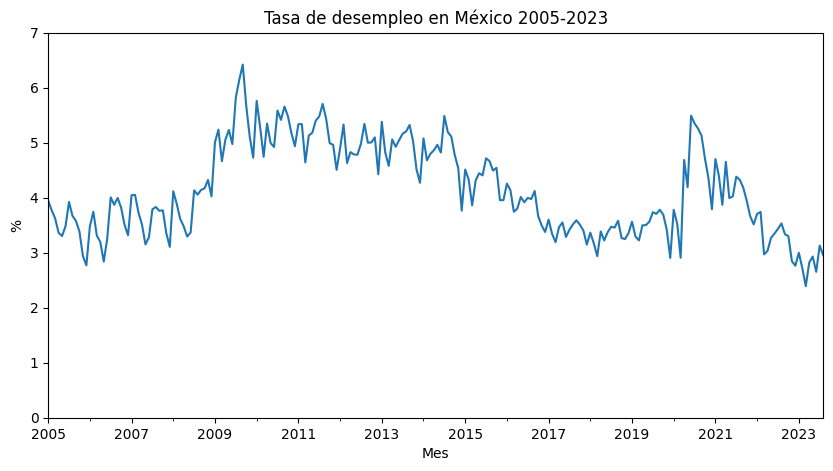

In [15]:
##graficar
desempleo_mex['tasa de desempleo'].plot(figsize = (10,5))
plt.title('Tasa de desempleo en México 2005-2023')
plt.ylabel('%')
plt.xlabel('Mes')
plt.ylim(0,7)
plt.show();

In [16]:
## prueba de raíz unitaria
prueba_adf = adfuller(desempleo_mex['tasa de desempleo'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.25

NO rechazamos H0, significa que la tasa de desempleo es una serie no estacionaria

In [17]:
# aplicamos primeras diferencias
desempleo_mex['desempleo_diff'] = desempleo_mex['tasa de desempleo'].diff()

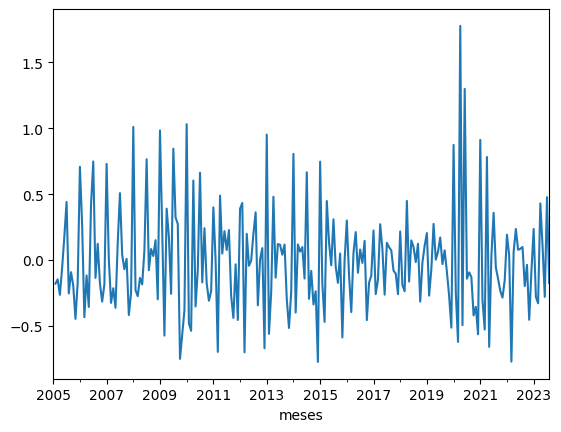

In [18]:
desempleo_mex['desempleo_diff'].plot();

In [19]:
#prueba raíz unitaria a las 1ras diferencias
prueba_adf1 = adfuller(desempleo_mex['desempleo_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.01

Rechazamos H0, las primeras diferencias del desempleo son una serie estacionaria.

* desempleo integrado I(1)

* 1ras diff integrado I(0)

Determinar el orden del proceso

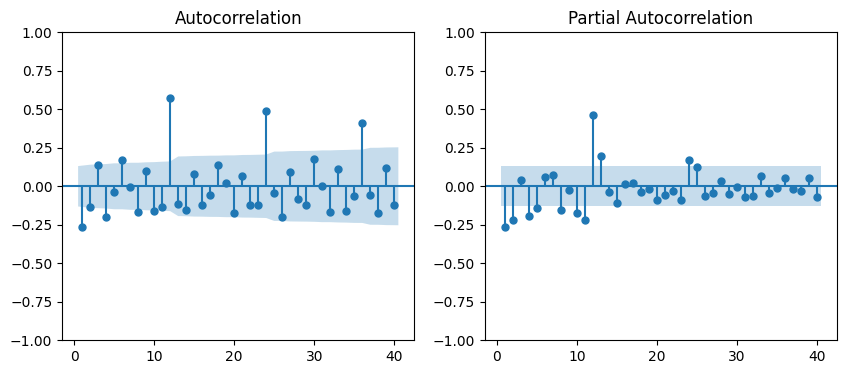

In [21]:
## graficas de autocorrelacion
ig, ax = plt.subplots(1,2, figsize = (10,4))

# 1er
plot_acf(desempleo_mex['desempleo_diff']. dropna(), zero= False, lags = 40, ax = ax[0])
#2da
plot_pacf(desempleo_mex['desempleo_diff']. dropna(), zero= False, lags = 40, ax = ax[1])
plt.show();

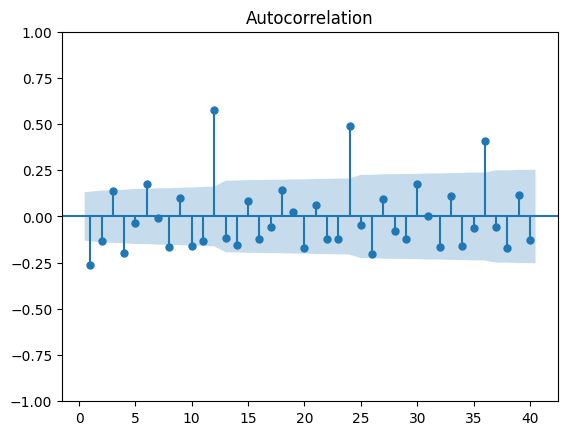

In [25]:
plot_acf(desempleo_mex['desempleo_diff']. dropna(), zero= False, lags = 40);


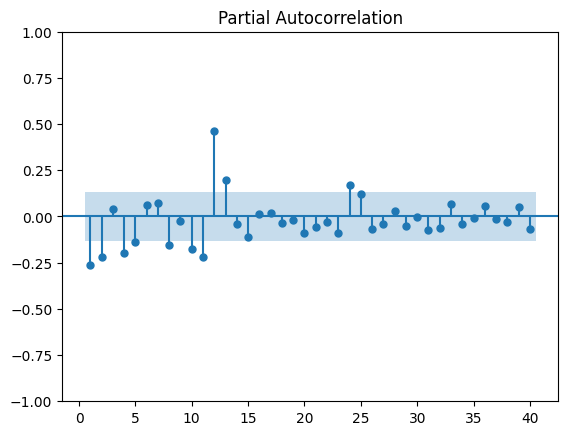

In [26]:
plot_pacf(desempleo_mex['desempleo_diff']. dropna(), zero= False, lags = 40);

Dado el patrón repetitivo de las gráficas de correlación estamos ante una serie con componente estacionario.

In [28]:
# obtener el orden
pm.auto_arima(desempleo_mex['tasa de desempleo'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'aic',
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

La tasa de desempleo SARIMA(1,1,0)(1,0,1,12)

In [29]:
model = ARIMA(desempleo_mex['tasa de desempleo'],
              order = (1,1,0),
              seasonal_order = (1,0,1,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  tasa de desempleo   No. Observations:                  224
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -28.306
Date:                            Fri, 27 Oct 2023   AIC                             64.613
Time:                                    15:03:11   BIC                             78.241
Sample:                                01-01-2005   HQIC                            70.115
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3689      0.061     -6.075      0.000      -0.488      -0.250
ar.S.L12       0.9763      0.014   

In [30]:
desempleo_mex['sarima'] = results.predict()

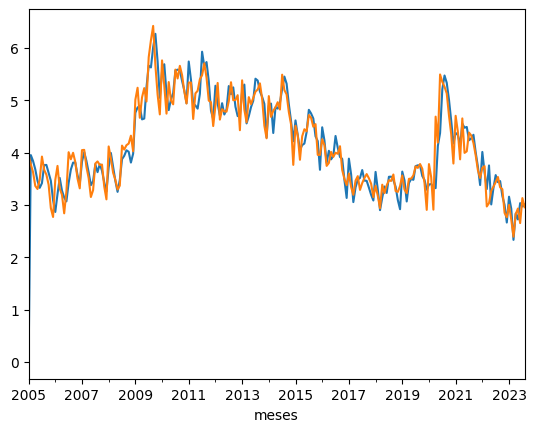

In [31]:
desempleo_mex['sarima'].plot()
desempleo_mex['tasa de desempleo'].plot()
plt.show()

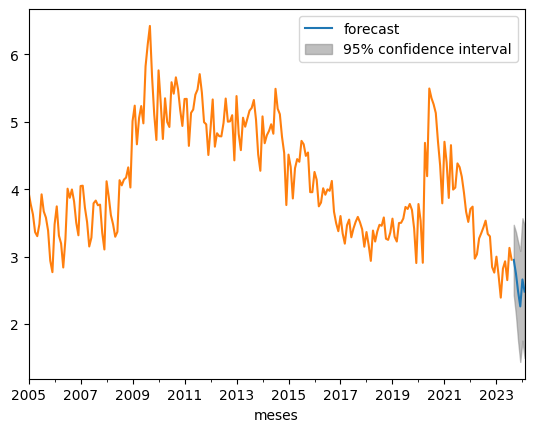

In [32]:
plot_predict(results, start = '2023-09-01', end = '2024-02-01')
desempleo_mex['tasa de desempleo'].plot()
plt.show()

In [33]:
forecast = results.get_forecast(steps = 6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [34]:
inicio = '2023-09-01'
fin = '2024-02-01'

In [35]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [36]:
pronostico_valor

2023-09-01    2.951735
2023-10-01    2.750669
2023-11-01    2.483561
2023-12-01    2.262441
2024-01-01    2.661989
2024-02-01    2.481788
Freq: MS, Name: predicted_mean, dtype: float64

In [37]:
pronostico_intervalos

,lower tasa de desempleo,upper tasa de desempleo
2023-09-01,2.431389,3.472082
2023-10-01,2.135374,3.365963
2023-11-01,1.750114,3.217009
2023-12-01,1.439566,3.085317
2024-01-01,1.754471,3.569507
2024-02-01,1.498252,3.465324


In [39]:
df_pronostico = pd.DataFrame({
    'pronostico' : pronostico_valor,
    'límite inferior': pronostico_intervalos['lower tasa de desempleo'],
    'límite superior' : pronostico_intervalos['upper tasa de desempleo']
})

df_pronostico

,pronostico,límite inferior,límite superior
2023-09-01,2.951735,2.431389,3.472082
2023-10-01,2.750669,2.135374,3.365963
2023-11-01,2.483561,1.750114,3.217009
2023-12-01,2.262441,1.439566,3.085317
2024-01-01,2.661989,1.754471,3.569507
2024-02-01,2.481788,1.498252,3.465324


In [44]:
print(f"para septiembre de 2023 pronosticamos una tasa de desempleo de {df_pronostico.iloc[0,0].round(2)}%\n Pero puede estar entre {df_pronostico.iloc[0,1].round(2)}% y {df_pronostico.iloc[0,2].round(2)}%")

para septiembre de 2023 pronosticamos una tasa de desempleo de 2.95%
 Pero puede estar entre 2.43% y 3.47%


## Pronostico del Euro

In [45]:
euro= pd.read_excel('euro_mxn.xlsx')
euro.head(5)

,Date,tipo_euro
0,2018-10-29,23.002001
1,2018-11-05,22.935900
2,2018-11-12,22.970230
3,2018-11-19,23.150999
4,2018-11-26,23.081200


In [46]:
euro.dtypes

Date         datetime64[ns]
tipo_euro           float64
dtype: object

In [47]:
euro = euro.rename(columns={'Date' : 'Semana'})

In [48]:
euro.isnull().sum()

Semana       0
tipo_euro    0
dtype: int64

In [49]:
## hacerlo index
euro = euro.set_index('Semana')

In [50]:
euro.head()

,tipo_euro
Semana,
2018-10-29,23.002001
2018-11-05,22.935900
2018-11-12,22.970230
2018-11-19,23.150999
2018-11-26,23.081200


In [51]:
## asignar frecuencia
euro = euro.asfreq('W-MON')

In [52]:
euro.head()

,tipo_euro
Semana,
2018-10-29,23.002001
2018-11-05,22.935900
2018-11-12,22.970230
2018-11-19,23.150999
2018-11-26,23.081200


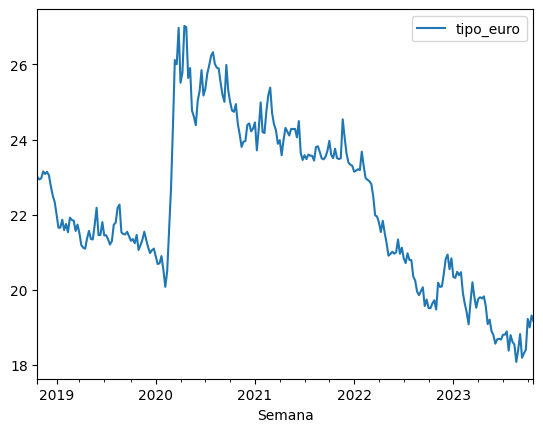

In [53]:
euro.plot();

In [54]:
## prueba raíz unitaria
prueba_adf = adfuller(euro['tipo_euro'])

In [55]:
pvalue = prueba_adf[1]
pvalue.round(2)

0.69

No rechazamos H0, el tipo del euro es una serie no estacionaria.

In [56]:
## 1ras diferencias
euro['euro_diff'] = euro['tipo_euro'].diff()

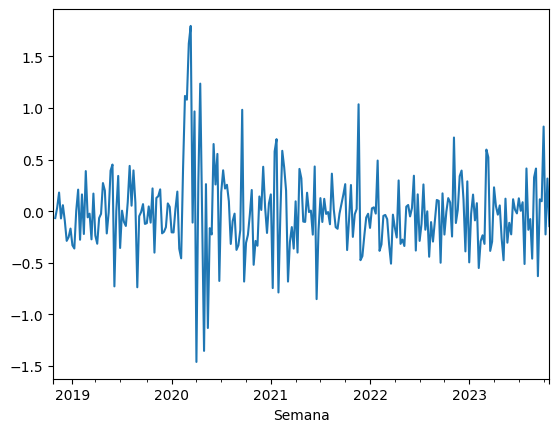

In [58]:
euro['euro_diff'].plot();

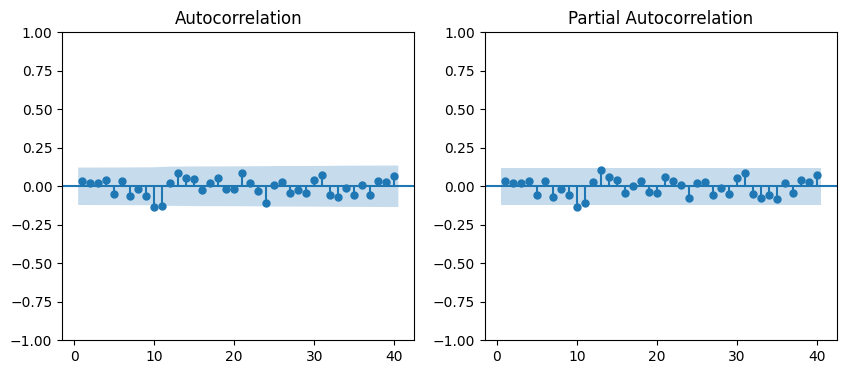

In [60]:
## graficas de autocorrelacion
ig, ax = plt.subplots(1,2, figsize = (10,4))
#1er
plot_acf(euro['euro_diff'].dropna(), zero = False, lags = 40, ax = ax[0])
#2da
plot_pacf(euro['euro_diff'].dropna(), zero = False, lags = 40, ax = ax[1])
plt.show()

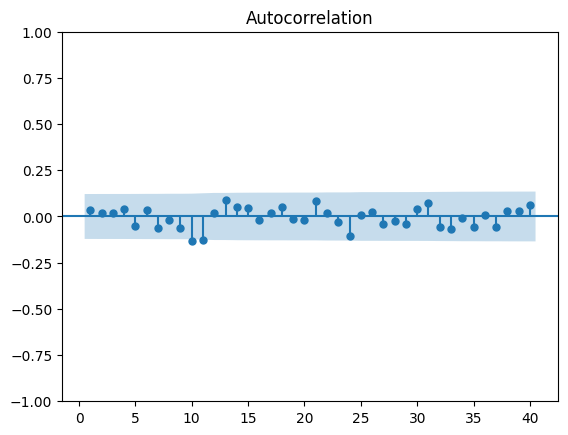

In [61]:
plot_acf(euro['euro_diff'].dropna(), zero = False, lags = 40);

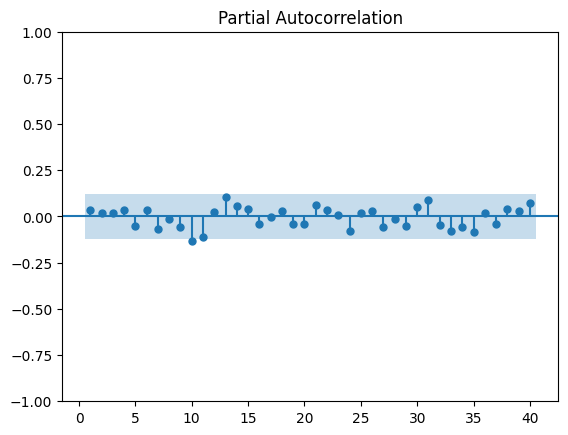

In [64]:
plot_pacf(euro['euro_diff'].dropna(), zero = False, lags = 40);

Dado que no hay patrón repetitivo en las gráficas de correlación, el tipo de cambio euro-peso es una serie sin componente estacional.

In [66]:
## determinar orden
pm.auto_arima(euro['euro_diff'].dropna(),
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'aic', seasonal = False)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Limitación del enfoque ARIMA, los ARIMA(0,1,0) = ARMA(0,0) = Ruido blanco, el ruido blanco no se puede pronosticar.

In [67]:
model = ARIMA(euro['tipo_euro'], order = (2,1,0))
results = model.fit()


In [72]:
euro['arima_fake'] = results.predict()

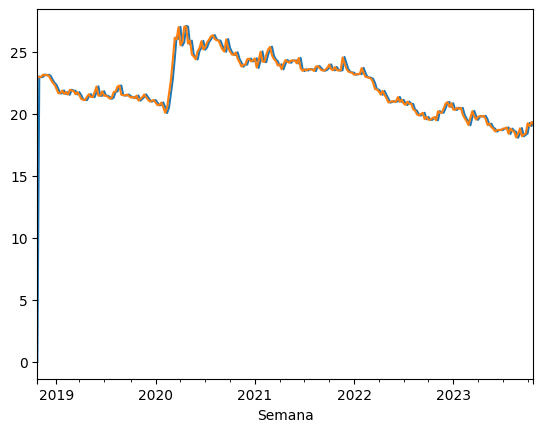

In [75]:
euro['arima_fake'].plot()
euro['tipo_euro'].plot();

In [85]:
forecast = results.get_forecast(steps = 4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [90]:
inicio= '2023-10-30'
fin = '2023-11-20'

In [91]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]


In [92]:
euro_prono = pd.DataFrame({'pronostico' : pronostico_valor,
                           'límite inferior' : pronostico_intervalos['lower tipo_euro'],
                           'límite superior' : pronostico_intervalos['upper tipo_euro']})

In [93]:
euro_prono

,pronostico,límite inferior,límite superior
2023-10-30,19.173376,18.405446,19.941306
2023-11-06,19.170443,18.065121,20.275765
2023-11-13,19.170371,17.798932,20.541809
2023-11-20,19.170307,17.575996,20.764619


In [95]:
print(f"Pronosticamos un tipo de cambio para la semana del 30 oct 2023 de {euro_prono.iloc[0,0].round(2)}\nPero puede estar entre {euro_prono.iloc[0,1].round(2)} y {euro_prono.iloc[0,2].round(2)}")

Pronosticamos un tipo de cambio para la semana del 30 oct 2023 de 19.17
Pero puede estar entre 18.41 y 19.94
